# Effect of instance normalization

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# %load common_.py
from common import *

In [67]:
from ehv import correlation
from ehv.preprocessing_pipeline import ColumnTransformer, GroupedTransformer
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.compose import make_column_selector

In [53]:
df = e_load.load_raw_ideas_dir(
    Path("/data/weizmann/EhV/high_time_res"), 
    Path("/data/weizmann/EhV/weizmann-ehv-metadata/representations/ideas_features/"), 
    "ALL", 
    Path("/data/weizmann/EhV/weizmann-ehv-metadata/cell_populations/manual_gating/"),
    None, "Low/*.cif")
df = e_load.clean_column_names(df)
df = e_load.remove_unwanted_features(df)
df = e_load.tag_columns(df)

df = df[df["meta_label_coi"]]

reg = r"^meta_label_(.+)$"
label_vec = numpy.full((df.shape[0]), fill_value="unknown", dtype=object)
for col in df.filter(regex="(?i)meta_label_.*psba.*"):
    label_vec[df[col].values] = re.match(reg, col).groups(1)
    
df["meta_label"] = label_vec

df = df.reset_index(drop=True)

In [54]:
norm_df = ColumnTransformer(Normalizer(), make_column_selector(pattern="feat")).fit_transform(df)

<AxesSubplot:xlabel='feat_cont_intensity_mc_ch04', ylabel='feat_cont_intensity_mc_ch11'>

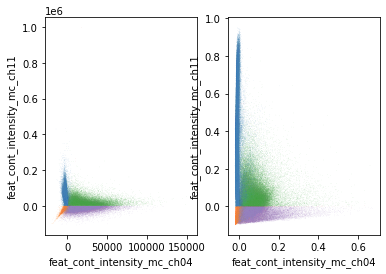

In [55]:
fig, ax = plt.subplots(1, 2)
seaborn.scatterplot(data=df, x="feat_cont_intensity_mc_ch04", y="feat_cont_intensity_mc_ch11", hue="meta_label", s=0.1, alpha=0.5, edgecolors="none", ax=ax[0], legend=False)
seaborn.scatterplot(data=norm_df, x="feat_cont_intensity_mc_ch04", y="feat_cont_intensity_mc_ch11", hue="meta_label", s=0.1, alpha=0.5, edgecolors="none", ax=ax[1], legend=False)

<AxesSubplot:xlabel='feat_cont_area_m01', ylabel='feat_cont_gradient_rms_m01_bf'>

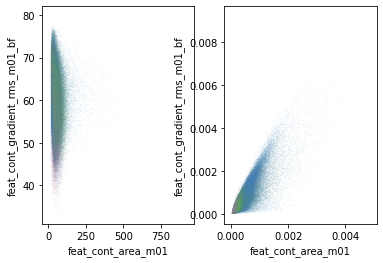

In [56]:
fig, ax = plt.subplots(1, 2)
seaborn.scatterplot(data=df, x="feat_cont_area_m01", y="feat_cont_gradient_rms_m01_bf", hue="meta_label", s=0.1, alpha=0.5, edgecolors="none", ax=ax[0], legend=False)
seaborn.scatterplot(data=norm_df, x="feat_cont_area_m01", y="feat_cont_gradient_rms_m01_bf", hue="meta_label", s=0.1, alpha=0.5, edgecolors="none", ax=ax[1], legend=False)

In [57]:
scaled_df = ColumnTransformer(preprocessing.StandardScaler(), make_column_selector(pattern="feat")).fit_transform(norm_df)

<AxesSubplot:xlabel='feat_cont_intensity_mc_ch04', ylabel='feat_cont_intensity_mc_ch11'>

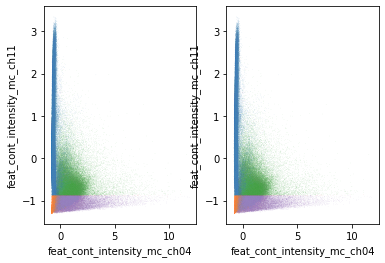

In [58]:
fig, ax = plt.subplots(1, 2)
seaborn.scatterplot(data=scaled_df, x="feat_cont_intensity_mc_ch04", y="feat_cont_intensity_mc_ch11", hue="meta_label", s=0.1, alpha=0.5, edgecolors="none", ax=ax[0], legend=False)
seaborn.scatterplot(data=scaled_df, x="feat_cont_intensity_mc_ch04", y="feat_cont_intensity_mc_ch11", hue="meta_label", s=0.1, alpha=0.5, edgecolors="none", ax=ax[1], legend=False)

In [59]:
scaled_df["feat_cont_intensity_mc_ch04"].describe()

count    3.390450e+05
mean     5.499164e-17
std      1.000001e+00
min     -8.499553e-01
25%     -6.547925e-01
50%     -5.061403e-01
75%      4.481377e-01
max      1.179420e+01
Name: feat_cont_intensity_mc_ch04, dtype: float64

In [60]:
rob_scaled_df = ColumnTransformer(preprocessing.RobustScaler(), make_column_selector(pattern="feat")).fit_transform(norm_df)

<AxesSubplot:xlabel='feat_cont_intensity_mc_ch04', ylabel='feat_cont_intensity_mc_ch11'>

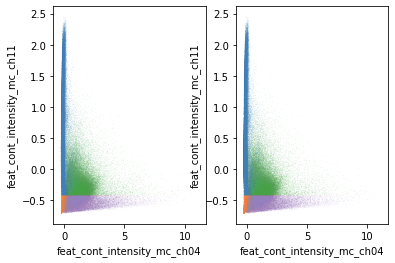

In [61]:
fig, ax = plt.subplots(1, 2)
seaborn.scatterplot(data=rob_scaled_df, x="feat_cont_intensity_mc_ch04", y="feat_cont_intensity_mc_ch11", hue="meta_label", s=0.1, alpha=0.5, edgecolors="none", ax=ax[0], legend=False)
seaborn.scatterplot(data=rob_scaled_df, x="feat_cont_intensity_mc_ch04", y="feat_cont_intensity_mc_ch11", hue="meta_label", s=0.1, alpha=0.5, edgecolors="none", ax=ax[1], legend=False)

In [62]:
rob_scaled_df["feat_cont_intensity_mc_ch04"].describe()

count    339045.000000
mean          0.458905
std           0.906677
min          -0.311729
25%          -0.134779
50%           0.000000
75%           0.865221
max          11.152419
Name: feat_cont_intensity_mc_ch04, dtype: float64

In [71]:
pow_trans_df = ColumnTransformer(preprocessing.PowerTransformer(), make_column_selector(pattern="feat|meta_timepoint")).fit_transform(norm_df)

<AxesSubplot:xlabel='feat_cont_intensity_mc_ch04', ylabel='feat_cont_intensity_mc_ch11'>

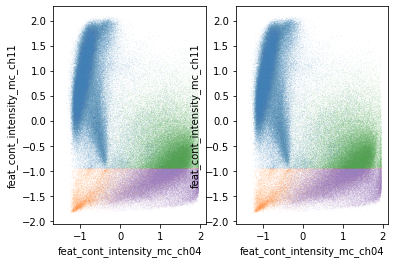

In [72]:
fig, ax = plt.subplots(1, 2)
seaborn.scatterplot(data=pow_trans_df, x="feat_cont_intensity_mc_ch04", y="feat_cont_intensity_mc_ch11", hue="meta_label", s=0.1, alpha=0.5, edgecolors="none", ax=ax[0], legend=False)
seaborn.scatterplot(data=pow_trans_df, x="feat_cont_intensity_mc_ch04", y="feat_cont_intensity_mc_ch11", hue="meta_label", s=0.1, alpha=0.5, edgecolors="none", ax=ax[1], legend=False)

In [73]:
pow_trans_df["feat_cont_intensity_mc_ch04"].describe()

count    3.390450e+05
mean     5.365038e-18
std      1.000001e+00
min     -1.494204e+00
25%     -8.729094e-01
50%     -4.778181e-01
75%      1.005337e+00
max      1.962610e+00
Name: feat_cont_intensity_mc_ch04, dtype: float64

<AxesSubplot:xlabel='feat_cont_width_m04', ylabel='Count'>

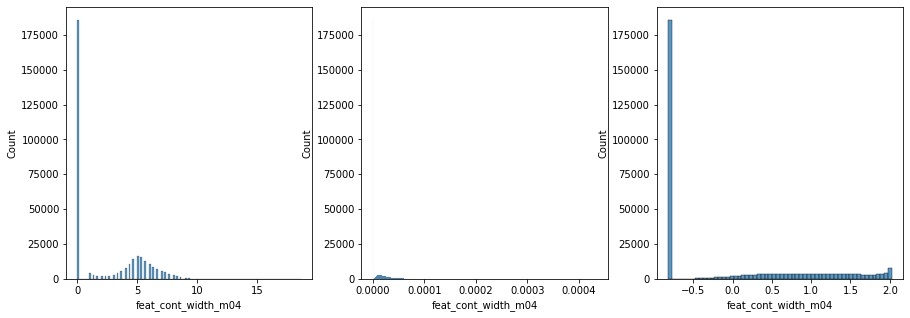

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
seaborn.histplot(data=df, x="feat_cont_width_m04", ax=ax[0])
seaborn.histplot(data=norm_df, x="feat_cont_width_m04", ax=ax[1])
seaborn.histplot(data=pow_trans_df, x="feat_cont_width_m04", ax=ax[2])

In [76]:
df["feat_cont_width_m03"].unique()

array([ 2.3333333 ,  3.        ,  0.        ,  2.        ,  2.6666667 ,
        5.6666665 ,  4.        ,  3.6666667 ,  1.        ,  3.3333333 ,
        4.3333335 ,  6.        ,  4.6666665 ,  5.        ,  1.6666666 ,
        5.3333335 ,  6.3333335 ,  1.3333334 ,  7.        ,  6.6666665 ,
       10.666667  ,  9.333333  ,  7.3333335 ,  8.        ,  8.666667  ,
        7.6666665 ,  8.333333  ,  9.        , 10.        , 11.333333  ,
       11.        , 13.666667  , 12.666667  , 12.        , 13.333333  ,
       14.333333  ,  9.666667  , 12.333333  , 10.333333  , 13.        ,
       11.666667  , 14.        ,  0.33333334, 14.666667  , 15.333333  ,
       18.666666  , 15.        , 18.333334  , 15.666667  ,  0.6666667 ,
       16.666666  , 19.666666  , 17.        , 19.        , 17.333334  ,
       16.        , 16.333334  ], dtype=float32)

<AxesSubplot:xlabel='feat_cont_height_m03', ylabel='Count'>

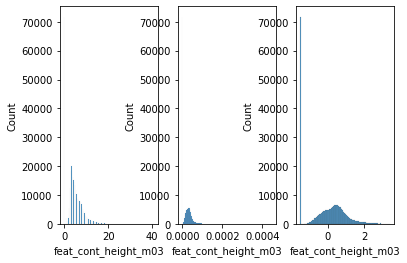

In [78]:
fig, ax = plt.subplots(1, 3)
seaborn.histplot(data=df, x="feat_cont_height_m03", ax=ax[0])
seaborn.histplot(data=norm_df, x="feat_cont_height_m03", ax=ax[1])
seaborn.histplot(data=pow_trans_df, x="feat_cont_height_m03", ax=ax[2])

In [79]:
df["feat_cont_height_m03"].unique()

array([ 2.6666667,  3.3333333,  0.       ,  3.6666667,  7.3333335,
        3.       , 13.666667 ,  4.6666665,  6.       ,  7.6666665,
        1.       ,  4.3333335, 10.666667 ,  5.       ,  4.       ,
        6.3333335,  8.       , 11.666667 ,  2.3333333,  8.666667 ,
        5.6666665,  6.6666665,  8.333333 , 10.333333 ,  5.3333335,
        7.       ,  2.       ,  9.666667 , 12.333333 ,  9.333333 ,
       12.       , 15.       , 12.666667 , 17.666666 , 14.666667 ,
        1.3333334,  1.6666666,  9.       , 14.       , 11.333333 ,
       15.333333 , 10.       , 11.       , 14.333333 , 16.       ,
       13.333333 , 13.       , 18.333334 , 21.666666 , 17.       ,
       15.666667 , 17.333334 , 16.666666 , 18.666666 , 19.       ,
       19.666666 , 16.333334 , 20.333334 , 18.       , 20.666666 ,
       25.       , 20.       , 21.333334 , 19.333334 , 22.666666 ,
       27.666666 , 22.       , 26.       , 21.       , 23.666666 ,
       24.333334 , 23.333334 , 25.333334 , 25.666666 , 27.3333

In [81]:
df["feat_cont_area_m03"].value_counts()

0.000000     71718
1.000000      2084
7.888889      1778
8.111111      1770
8.888889      1723
             ...  
86.666664        1
89.000000        1
79.888885        1
82.000000        1
91.777779        1
Name: feat_cont_area_m03, Length: 806, dtype: int64

In [84]:
df["feat_cont_intensity_mc_ch04"].value_counts()

-594.000000      8
-669.000000      8
-858.000000      7
-1014.000000     7
-741.000000      7
                ..
-985.208313      1
 2596.617188     1
 14327.794922    1
 18843.826172    1
-819.739136      1
Name: feat_cont_intensity_mc_ch04, Length: 330596, dtype: int64